In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/bank.csv')
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

# EDA

Distribution of subscriptions (yes or no)

<Axes: xlabel='y', ylabel='count'>

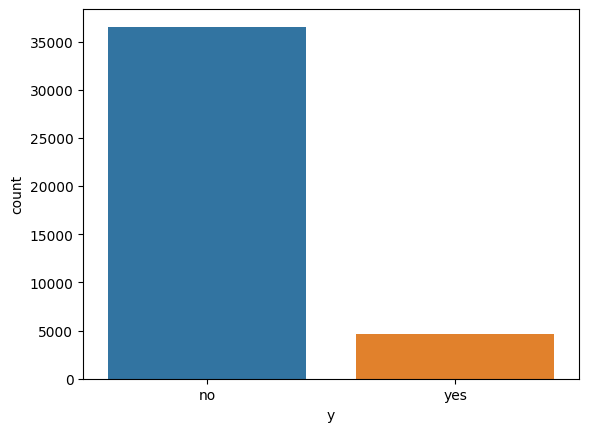

In [ ]:
sns.countplot(x='y', data=df , hue='y')

Relationship Between count of subscriptions and  Marital Status with age

Text(0, 0.5, 'Age')

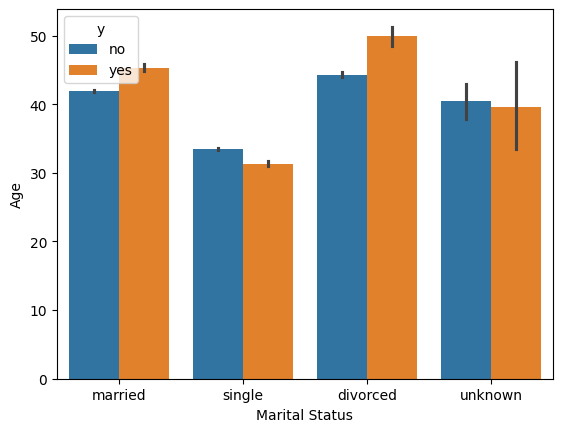

In [ ]:
sns.barplot(x='marital', y='age', hue='y', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Age')

Relation between job and subscription

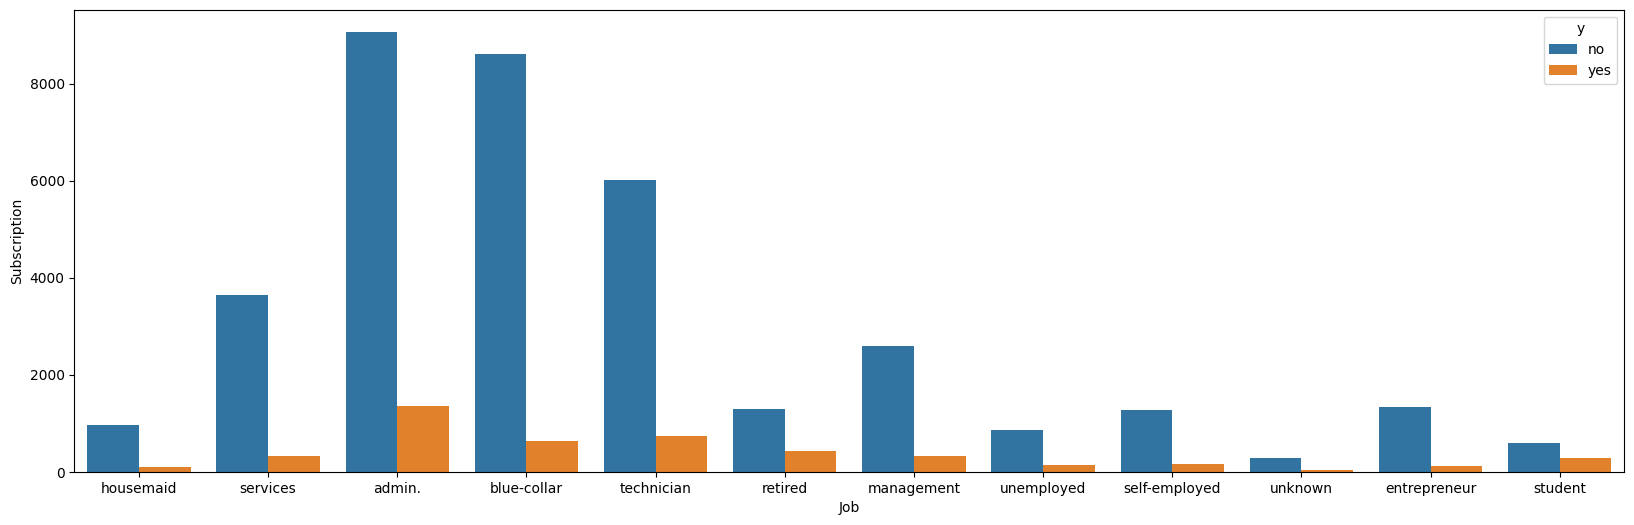

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='job', data=df , hue = 'y')
plt.xlabel('Job')
plt.ylabel('Subscription')
plt.show()

subscription by month

Text(0, 0.5, 'num of subscribers')

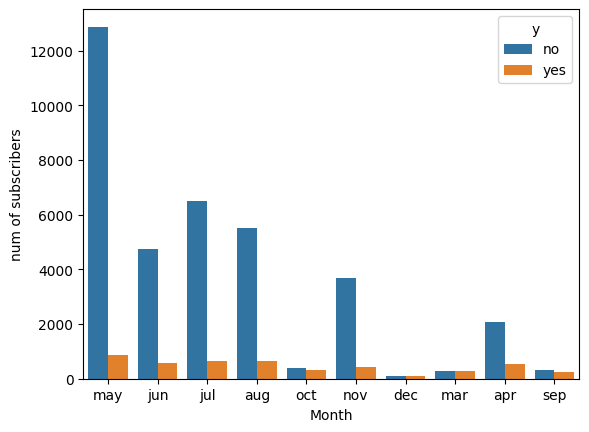

In [ ]:
sns.countplot(x='month',hue= 'y', data=df)
plt.xlabel('Month')
plt.ylabel('num of subscribers')

Count of Individuals with Personal Loan

Text(0, 0.5, 'Count of Individuals')

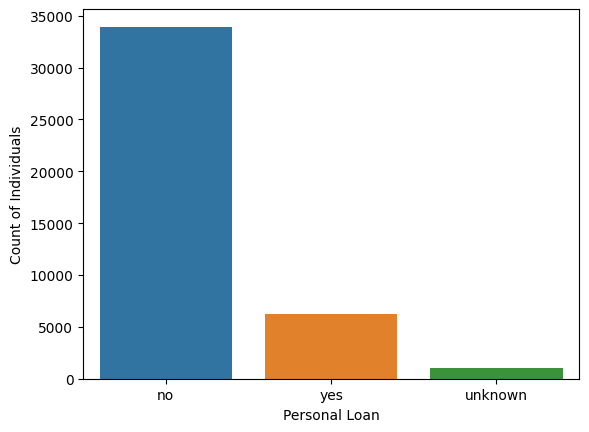

In [ ]:
sns.countplot(x='loan', data=df , hue='loan')
plt.ylabel('Count')
plt.xlabel('Personal Loan')
plt.ylabel('Count of Individuals')

Count of Individuals with housing

Text(0, 0.5, 'Count of Individuals')

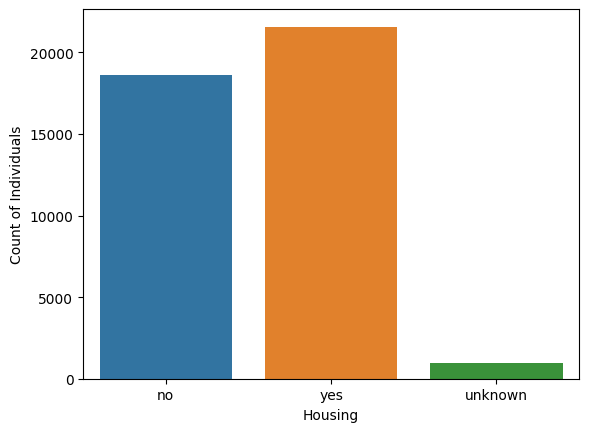

In [ ]:
sns.countplot(x='housing', data=df , hue='housing')
plt.xlabel('Housing')
plt.ylabel('Count of Individuals')

Count of Individuals with Credit Default

Text(0, 0.5, 'Count of Individuals')

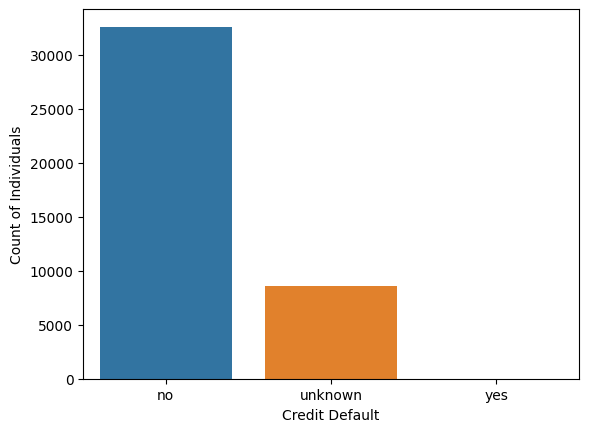

In [ ]:
sns.countplot(x='default', data=df , hue='default')
plt.xlabel('Credit Default')
plt.ylabel('Count of Individuals')

Text(0, 0.5, 'Count of Individuals')

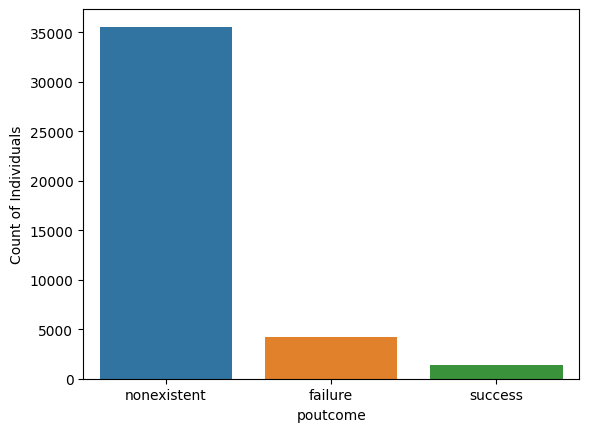

In [ ]:
sns.countplot(x='poutcome', data=df , hue='poutcome')
plt.xlabel('poutcome')
plt.ylabel('Count of Individuals')

In [ ]:
age_outcome = df.groupby('age')['poutcome'].value_counts().unstack().fillna(0)
age_outcome

poutcome,failure,nonexistent,success
age,,,
17,2.0,0.0,3.0
18,6.0,15.0,7.0
19,8.0,26.0,8.0
20,12.0,44.0,9.0
21,15.0,79.0,8.0
...,...,...,...
91,1.0,1.0,0.0
92,1.0,0.0,3.0
94,1.0,0.0,0.0


In [ ]:
job_loan_default_housing = df.groupby('job')[['loan', 'default', 'housing']].apply(lambda x: (x == 'yes').any(axis=1).sum())
df['job_loan_default_housing'] = df['job'].map(job_loan_default_housing)
job_loan_default_housing

job
admin.           6227
blue-collar      5312
entrepreneur      862
housemaid         608
management       1683
retired           977
self-employed     818
services         2301
student           529
technician       4004
unemployed        612
unknown           197
dtype: int64

In [ ]:
df['financial_status'] = df[['default', 'housing', 'loan']].sum(axis=1)

In [ ]:
df['under_age'] = df['age'].apply(lambda x: 1 if x < 30 else 0)
df['over_age'] = df['age'].apply(lambda x: 1 if x >= 30 else 0)

In [ ]:
categorical_data = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['float64' , 'int64']).columns

le = LabelEncoder()
for i in categorical_data:
    df[i] = le.fit_transform(df[i])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_loan_default_housing,financial_status,under_age,over_age
0,56,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,608,0,0,1
1,57,7,1,3,1,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,2301,1,0,1
2,37,7,1,3,0,2,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,2301,2,0,1
3,40,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,6227,0,0,1
4,56,7,1,3,0,0,2,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,2301,2,0,1


In [ ]:
def detect_outliers_df(df, threshold=3):
    outliers_dict = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        data = df[column]
        outliers = detect_outliers(data, threshold)
        outliers_dict[column] = outliers
    return outliers_dict

Text(0.5, 1.0, 'Correlation Matrix')

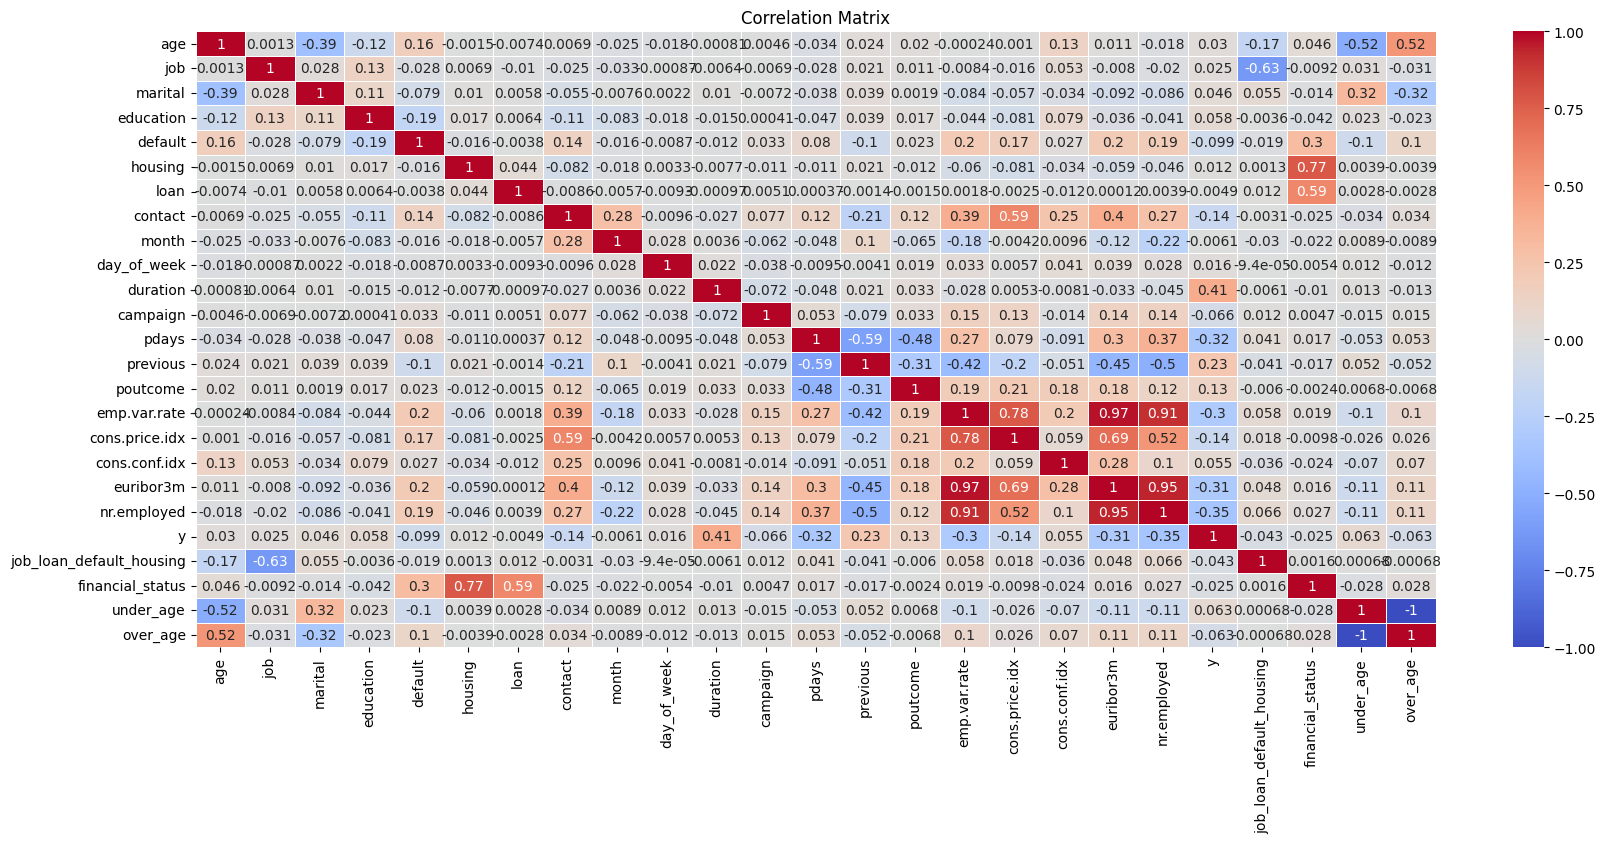

In [ ]:
plt.figure(figsize=(20, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

In [ ]:
x = df.drop('y' ,axis = 1)
y = df['y']

In [ ]:
y.value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# NN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model = Sequential()
model.add(layers.Dense(64 , activation='relu',input_dim = x.shape[1]))
model.add(layers.Dense(64 , activation='relu' ))
model.add(layers.Dense(32 , activation='relu' ))
model.add(layers.Dense(32 , activation='relu' ))
model.add(layers.Dense(16 , activation='relu' ))
model.add(layers.Dense(16 , activation='relu' ))
model.add(layers.Dense(1 , activation='sigmoid'))

model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 64)                1600      
                                                                 
 dense_118 (Dense)           (None, 64)                4160      
                                                                 
 dense_119 (Dense)           (None, 32)                2080      
                                                                 
 dense_120 (Dense)           (None, 32)                1056      
                                                                 
 dense_121 (Dense)           (None, 16)                528       
                                                                 
 dense_122 (Dense)           (None, 16)                272       
                                                                 
 dense_123 (Dense)           (None, 1)               

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy' ,metrics=['accuracy'])
model.fit(x_train , y_train , epochs=100 , batch_size=64 , validation_data=(x_test, y_test))

Epoch 1/100
515/515 [==============================] - 3s 3ms/step - loss: 0.4518 - accuracy: 0.8833 - val_loss: 0.2605 - val_accuracy: 0.8978
Epoch 2/100
515/515 [==============================] - 2s 3ms/step - loss: 0.2790 - accuracy: 0.8972 - val_loss: 0.2800 - val_accuracy: 0.8973
Epoch 3/100
515/515 [==============================] - 2s 3ms/step - loss: 0.2606 - accuracy: 0.8981 - val_loss: 0.2506 - val_accuracy: 0.9017
Epoch 4/100
515/515 [==============================] - 2s 3ms/step - loss: 0.2465 - accuracy: 0.8999 - val_loss: 0.2519 - val_accuracy: 0.8963
Epoch 5/100
515/515 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.8988 - val_loss: 0.2504 - val_accuracy: 0.8963
Epoch 6/100
515/515 [==============================] - 2s 4ms/step - loss: 0.2429 - accuracy: 0.9007 - val_loss: 0.2278 - val_accuracy: 0.9010
Epoch 7/100
515/515 [==============================] - 3s 5ms/step - loss: 0.2361 - accuracy: 0.9012 - val_loss: 0.2317 - val_accuracy: 0.8992

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc*100)

258/258 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9075
Test accuracy: 90.74793457984924


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5)

print(classification_report(y_test, y_pred_binary))
print('roc_auc:', roc_auc_score(y_test, y_pred))

258/258 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7269
           1       0.63      0.53      0.57       967

    accuracy                           0.91      8236
   macro avg       0.78      0.74      0.76      8236
weighted avg       0.90      0.91      0.90      8236

roc_auc: 0.9360946593195196
